# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Function for Simulating Games

In [2]:
## Function for doing one game
def get_path_of_game( p ):
    '''
    Function for generating games according [JW02], example Markoff
    
    IN: p, prob. of success
    
    OUT: sequence of states, ending with bankrupt of victory
    '''
    # condition for ending game
    condition = True

    # starting
    X = [ 1 ]

    # loop for time/repeated games
    while condition:

        # determine amount of money to be bet
        # NOTE: being min. of missing money or all that is available
        bet = np.min( [ 5 - X[-1], X[-1] ] )

        # check for winning (or not)
        if np.random.rand() < p:
            X.append( X[ -1 ] + bet )

        else:
            X.append( X[ -1 ] - bet )

        condition = not( X[ -1 ] == 5 or X[ -1 ] <= 0 )  
    
    return X

# Simulation of Games

In [3]:
# probability of sucess
p = 0.5

# number of trials for estimating probability
N_trials = 1000

# number of games ending positively
numb_wins = 0

# lengths of games
len_game = []

# loop for trials
for _n in range( N_trials ): 

    # sample game
    X = get_path_of_game( p )
    
    # find prob. of winning
    if X[-1] == 5:
        numb_wins += 1
        
    # find duration of game        
    # NOTE: "-1" due to initialization
    len_game.append( len( X ) - 1 )
        
# output
print('\nEvaluating relevant parameters:')
print('-------------------------------')
print('Prob. of success: \t\t{:2.2f}'.format( numb_wins / N_trials ))
print('Average duration of game: \t{:2.2f}'.format( np.average( len_game ) ) )


Evaluating relevant parameters:
-------------------------------
Prob. of success: 		0.20
Average duration of game: 	2.04


# Plotting Realizations/Paths of the Game

Text(0,0.5,'$X(k)$')

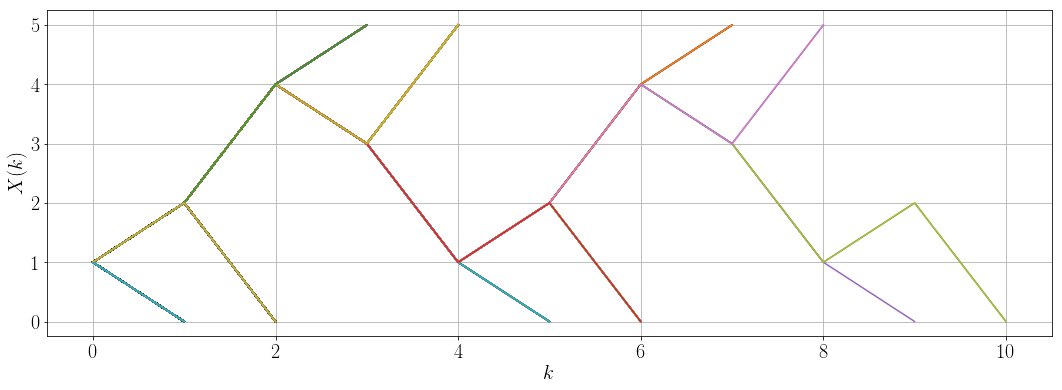

In [4]:
# you may change prob. of success
p = .5

# reducing number of trials since most paths are quite similar
N_trials = 1000

# plotting
for _n in range( N_trials ):
    plt.plot( get_path_of_game(p) )
    
plt.grid( True )
plt.xlabel('$k$')
plt.ylabel('$X(k)$')

# Trying to Solve for Stationary Distribution

In [5]:
# success probability 
p = 0.5

# transition matrix 
P = np.array( [
    [ 1, 0, 0, 0, 0, 0],
    [ 1-p, 0, p, 0, 0, 0 ],
    [ 1-p, 0, 0, 0, p, 0 ],
    [ 0, 1-p, 0, 0, 0, p ],
    [ 0, 0, 0, 1-p, 0 ,p ],
    [ 0, 0, 0, 0, 0, 1 ] 
    ])

# find eigendecomposition
# NOTE: P^T p = p equaling ( I - P^T ) p = 0;
#       so solution p would correspond to eigenvector to eigenvalue 1
Lambda, A = np.linalg.eig( P.T )

# output solutions 
for _n in range( len( Lambda ) ):
    
    if np.isclose( Lambda[ _n ], 1 ):
        print( 'Eigenvector to eigenvalue {}: \t{}'. format( Lambda[ _n ], A[ :, _n ] ) )


Eigenvector to eigenvalue (1+0j): 	[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
Eigenvector to eigenvalue (1+0j): 	[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j]


<b>Discussion:</b> Can you explain the solution by

* looking at the transition matrix
* providing intuitive reasons